In [1]:
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

import sklearn.metrics as metrics
import pandas as pd
import numpy as np

In [2]:

dataset = pd.read_csv("data.csv")
print(dataset.head())
X = dataset 
df=dataset

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black','blue','green'])

    x   y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


<Figure size 1008x504 with 0 Axes>

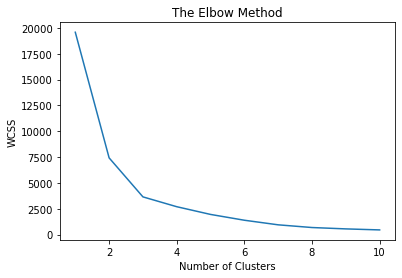

In [3]:

# Elbow method to find the optimal number of Clusters
data=df.iloc[:,:].values

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

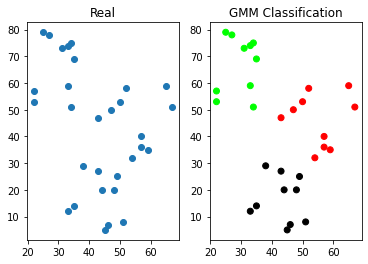

In [4]:

#Elbow point is 3 
#Therefore n_component is 3
# REAL PLOT
plt.subplot(1,2,1)
plt.title('Real')
plt.scatter(X.x,X.y)


# EM algo GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,2,2)
plt.title('GMM Classification')
plt.scatter(X.x,X.y,c=colormap[y_cluster_gmm])

#Confusion matrix cannot be calculated as target values are not given
#Accuracy cannot be measued as target values are not given
#print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
#print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))